Choose data source:

In [53]:
smnist = {
    "09-07-22": {
        "path": "../data/interim/memory_readings/dntm/smnist/smnist-2022-07-09-09-21/", 
        "epochs": [9, 19, 22, 29, 39],
    },
    "27-07-22": {
        "path": "../data/interim/memory_readings/dntm/smnist/smnist-2022-07-27/", 
        "epochs": [0, 10, 20, 30, 40],
    },
}

In [33]:
smnist_var = {
    "09-08-22": {
        "path": "../data/interim/memory_readings/dntm_var/smnist/smnist-var-2022-08-09/",
        "epochs": list(range(0,13)),
    }
}

---

In [2]:
! ls ../data/interim/memory_readings/

2022-07-05		 pmnist-var-2022-08-25_tmp  smnist-2022-07-27
pmnist-2022-07-09-18-14  smnist-2022-07-09-09-21    smnist-var-2022-08-09
pmnist-2022-07-14_07-33  smnist-2022-07-19-17-35    smnist-var-2022-08-22


In [2]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from model.dntm.MemoryReadingsStats import MemoryReadingsStats

In [46]:
mem_readings_stats = MemoryReadingsStats(path=PATH)

In [47]:
memory_readings_per_epoch = dict()

for epoch in EPOCHS:
    mem_readings_stats.load_memory_readings(epoch=epoch)
    memory_readings_per_epoch[epoch] = mem_readings_stats.memory_readings

In [68]:
# Load memory readings smnist
mem_readings_df = pd.DataFrame()

for model in smnist:
    mem_readings_stats = MemoryReadingsStats(path=smnist[model]['path'])
    memory_readings_per_epoch = dict()

    for epoch in smnist[model]['epochs']:
        mem_readings_stats.load_memory_readings(epoch=epoch)
        memory_readings_per_epoch[epoch] = mem_readings_stats.memory_readings

    for epoch, mem_readings in memory_readings_per_epoch.items():
        tmp_df = pd.DataFrame()
        tmp_df['epoch'] = [epoch]*len(mem_readings.T)
        tmp_df['2-norm'] = torch.norm(mem_readings, dim=0).cpu().numpy()
        tmp_df['run'] = [model]*len(mem_readings.T)
        mem_readings_df = pd.concat((mem_readings_df, tmp_df))

In [69]:
# Concat memory readings smnist var
for model in smnist_var:
    mem_readings_stats = MemoryReadingsStats(path=smnist_var[model]['path'])
    memory_readings_per_epoch = dict()

    for epoch in smnist_var[model]['epochs']:
        mem_readings_stats.load_memory_readings(epoch=epoch)
        memory_readings_per_epoch[epoch] = mem_readings_stats.memory_readings

    for epoch, mem_readings in memory_readings_per_epoch.items():
        tmp_df = pd.DataFrame()
        tmp_df['epoch'] = [epoch]*len(mem_readings.T)
        tmp_df['2-norm'] = torch.norm(mem_readings, dim=0).cpu().numpy()
        tmp_df['run'] = [model+'(var)']*len(mem_readings.T)
        mem_readings_df = pd.concat((mem_readings_df, tmp_df))

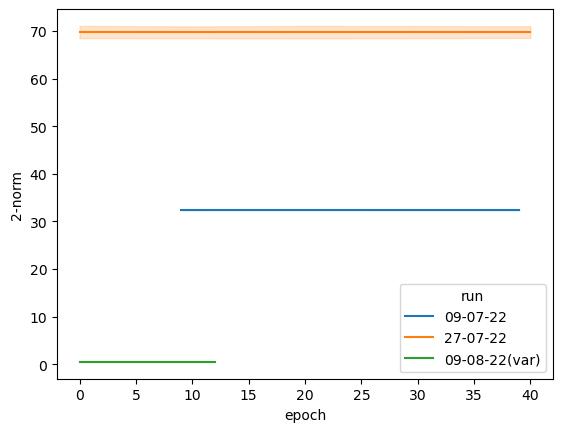

In [70]:
_ = sns.lineplot(mem_readings_df, x="epoch", y="2-norm", hue="run")